# Decision Tree Exercise

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree

In [3]:
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
y = wine["class"]
X = wine.loc[:, wine.columns!="class"]

In [7]:
print(y.shape)
print(X.shape)

(6497,)
(6497, 3)


In [8]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

😀 
# 1. Help!
### Add a standard scaler for X_train and X_test 
### I'd like to see the effect of standard scaler for logistic regression

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

prediction = logreg.predict(X_test)
print(prediction)

print(logreg.score(X_test, y_test))

[1. 1. 1. ... 1. 1. 1.]
0.768


In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_fit = sc.fit_transform(X_train)
X_test_fit = sc.transform (X_test)

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train_fit,y_train)

prediction = logreg.predict(X_test_fit)
print(prediction)

print(logreg.score(X_test_fit, y_test))

[1. 1. 1. ... 1. 1. 1.]
0.7655384615384615


😀 
# 2. Help

### I'd like to see the possibility of overfitting in my tree model.
### Could you add a test for train and test scores? 

In [12]:
# Tree model 

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

prediction = tree.predict(X_test)
print(prediction)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

[1. 0. 1. ... 1. 1. 1.]
0.9973316912972086
0.8516923076923076


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", roc_auc_score(y_train, grid_cv.predict(X_train)))
print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))

Param for GS {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
CV score for GS 0.9109896168525408
Train AUC ROC Score for GS:  0.8367773068235365
Test AUC ROC Score for GS:  0.8206972802934451


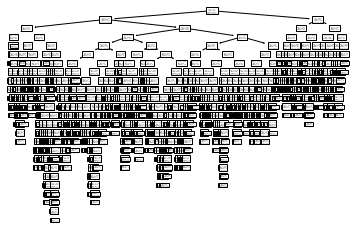

In [14]:
plot_tree(tree)
plt.show()

[Text(0.5, 0.8333333333333334, 'sugar <= 4.15\ngini = 0.364\nsamples = 4872\nvalue = [1165, 3707]'),
 Text(0.25, 0.5, 'sugar <= 1.625\ngini = 0.481\nsamples = 2690\nvalue = [1080, 1610]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'sugar <= 6.45\ngini = 0.075\nsamples = 2182\nvalue = [85, 2097]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

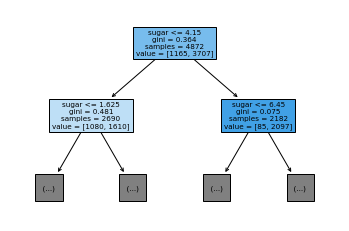

In [ ]:
# max_depth = 1
plot_tree(tree, max_depth=1, filled=True, feature_names = wine.columns[:-1])

😀 
# 3. Help

#### I'd like to see the feature importance after standard scaling. 

In [16]:
print(tree.feature_importances_)

[0.23367672 0.52013306 0.24619022]


In [15]:
tree_fit = DecisionTreeClassifier(random_state=42)
tree_fit.fit(X_train_fit, y_train)

print(tree_fit.feature_importances_)
print("There has no differences between original and standard scaled tree model, and decision tree is no need to be standard scaled.")

[0.23367672 0.52013306 0.24619022]
There has no differences between original and standard scaled tree model, and decision tree is no need to be standard scaled.
